## 1. Importation des bases de données

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

Importation des bases de données d'entrainements et de tests.

In [3]:
train_data = pd.read_csv('nyc-taxi-trip-duration/train.csv')
test_data = pd.read_csv('nyc-taxi-trip-duration/test.csv')
osmr_1 = pd.read_csv('new-york-city-taxi-with-osrm/fastest_routes_train_part_1.csv', 
                     usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])
osmr_2 = pd.read_csv('new-york-city-taxi-with-osrm/fastest_routes_train_part_2.csv',
                     usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])
"""osmr_3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MOST-IST/new-york-city-taxi-with-osrm/second_fastest_routes_train.csv',
                      usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])"""

"osmr_3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MOST-IST/new-york-city-taxi-with-osrm/second_fastest_routes_train.csv',\n                      usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])"

In [4]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [6]:
train_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Suppression de deux colonnes qui se revèlent pour le moment inutile.

In [7]:
#train_data.pop('id')
#train_data.pop('store_and_fwd_flag')

La fonction suivante permet de réduire la taille de la base d'entrainement afin de résoudre le problème du temps d'apprentissage et les limites de tailles pour certaines méthodes d'apprentissages.

In [8]:
def create_train_test_set(dataframe,
                          train_frac,
                          test_frac):
  """ Create the train and test set for the training with a random method
                Arguments :
                        dataframe : pandas DataFrame containing the date to split
                        train_frac : float, fraction number of training data to keep
                        test_frac : float, fraction number of test data to keep
                Outputs : 
                        train_features : pandas DataFrame of the training points selected randomly
                        train_labels : pandas DataFrame, outputs for the training
                        test_features : pandas DataFrame of the test points selected randomly
                        test_labels : pandas DataFrame, outputs for the tests
  """
  train_dataset = dataframe.sample(frac = train_frac, random_state = 0)
  tmp = dataframe.drop(train_dataset.index)
  test_dataset = tmp.sample(frac = test_frac, random_state = 0)
  tmp.drop(test_dataset.index)
  train_labels = train_dataset.pop('trip_duration')
  train_features = train_dataset
  test_labels = test_dataset.pop('trip_duration')
  test_features =test_dataset
  return train_features, train_labels, test_features, test_labels


In [9]:
""" Réduire la taille de la data base avant de tenter le plot """

def time_series(start, end):
    #time_series_df = train_data[['pickup_datetime', 'trip_duration']][(train_data['pickup_datetime'] >= start) & (train_data['pickup_datetime'] <= end)]
    x = train_data.pickup_datetime
    y = train_data['trip_duration']
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('Trip Duration')
    plt.title('Trip Duration Time Series')
    return plt.show();

# 2. Feature engineering

**ToDo :**


1.   Search for new combination of known data. 
2.   Ex: bird distance (beware the earth is round).
3.   Search on google and write down your ideas.
4.   Use correlation to experiment with attribute combination.
5.   Transpose date, time etc... to trigonomical coordinates.

---

**Ideas :**

*   5 arrondissements à New York (qui fonctionnent de façon plutôt indépendante)
*   Norme des taxis new yorkais (plutôt que la bird distance)
*   etc...
*   nb course par nb gens dans taxi


## Météo

L'API OpenWeatherAPI ne peut nous fournir que la météo d'aujourd'hui comme montré ci-dessous.

In [10]:
import requests
from pprint import pprint

API_key = "9bb3a68ab710caee8e2c2f857313f55d"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
city_id = "5128638"
Final_url = base_url + "appid=" + API_key + "&id=" + city_id
weather_data = requests.get(Final_url).json()

# JSON data is difficult to visualize, so you need to pretty print 
pprint(weather_data)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 43, 'lon': -75.5},
 'dt': 1583595738,
 'id': 5128638,
 'main': {'feels_like': 264,
          'humidity': 50,
          'pressure': 1029,
          'temp': 271.12,
          'temp_max': 272.59,
          'temp_min': 269.82},
 'name': 'New York',
 'sys': {'country': 'US',
         'id': 5681,
         'sunrise': 1583580434,
         'sunset': 1583621929,
         'type': 1},
 'timezone': -18000,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'speed': 5.7}}


Nous allons donc utiliser un dataset recensant les mesures météorologiques faites depuis la station de Central Park pour les 6 premiers mois de 2016.

In [11]:
weather = pd.read_csv("weather/weather_data_nyc_centralpark_2016.csv")

import datetime

weather['date'] = weather['date'].apply(lambda x : datetime.datetime.strptime(x, '%d-%m-%Y'))
weather['maximum temperature (°C)'] = (weather['maximum temperature'] - 32)*5/9
weather['minimum temperature (°C)'] = (weather['minimum temperature'] - 32)*5/9
weather['average temperature (°C)'] = (weather['average temperature'] - 32)*5/9
  
weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,maximum temperature (°C),minimum temperature (°C),average temperature (°C)
0,2016-01-01,42,34,38.0,0.00,0.0,0,5.555556,1.111111,3.333333
1,2016-01-02,40,32,36.0,0.00,0.0,0,4.444444,0.000000,2.222222
2,2016-01-03,45,35,40.0,0.00,0.0,0,7.222222,1.666667,4.444444
3,2016-01-04,36,14,25.0,0.00,0.0,0,2.222222,-10.000000,-3.888889
4,2016-01-05,29,11,20.0,0.00,0.0,0,-1.666667,-11.666667,-6.666667


In [12]:
train_data_w = train_data
train_data_w['pickup_datetime'] = pd.to_datetime(train_data_w['pickup_datetime'])
train_data_w['date'] = train_data_w['pickup_datetime'].dt.date
#weather ['date'] = pd.to_datetime(weather['date'])
#weather['date'] = weather['date'].dt.date
train_data_w.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26


In [13]:
train_data_w['date'] = pd.to_datetime(train_data_w['date'])
train_data = pd.merge(train_data_w, weather[['date','minimum temperature','maximum temperature', 'average temperature', 'minimum temperature (°C)','maximum temperature (°C)', 'average temperature (°C)','precipitation', 'snow fall', 'snow depth']], on = 'date', how = 'left')
train_data.shape[0]
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date,minimum temperature,maximum temperature,average temperature,minimum temperature (°C),maximum temperature (°C),average temperature (°C),precipitation,snow fall,snow depth
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,40,51,45.5,4.444444,10.555556,7.500000,0.29,0.0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,62,83,72.5,16.666667,28.333333,22.500000,0.00,0.0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,16,28,22.0,-8.888889,-2.222222,-5.555556,0.00,0.0,T
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-04-06,30,48,39.0,-1.111111,8.888889,3.888889,0.00,0.0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,38,55,46.5,3.333333,12.777778,8.055556,0.00,0.0,0


In [144]:
weather.iloc[73]
np.sum(train_data.isna())

id                          0
vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
trip_duration               0
date                        0
minimum temperature         0
maximum temperature         0
average temperature         0
minimum temperature (°C)    0
maximum temperature (°C)    0
average temperature (°C)    0
precipitation               0
snow fall                   0
snow depth                  0
dtype: int64

In [0]:
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
train_data['dropoff_datetime'] = pd.to_datetime(train_data['dropoff_datetime'])

In [146]:
train_data['pickup_year'] = train_data['pickup_datetime'].dt.year
train_data['pickup_month'] = train_data['pickup_datetime'].dt.month
train_data['pickup_day'] = train_data['pickup_datetime'].dt.day
train_data['pickup_hour'] = train_data['pickup_datetime'].dt.hour
train_data['pickup_minute'] = train_data['pickup_datetime'].dt.minute
train_data['pickup_weekday'] = train_data['pickup_datetime'].dt.weekday
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,minimum temperature,maximum temperature,average temperature,minimum temperature (°C),maximum temperature (°C),average temperature (°C),precipitation,snow fall,snow depth,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,40,51,45.5,4.444444,10.555556,7.500000,0.29,0.0,0,2016,3,14,17,24,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,62,83,72.5,16.666667,28.333333,22.500000,0.00,0.0,0,2016,6,12,0,43,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,16,28,22.0,-8.888889,-2.222222,-5.555556,0.00,0.0,T,2016,1,19,11,35,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,30,48,39.0,-1.111111,8.888889,3.888889,0.00,0.0,0,2016,4,6,19,32,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,38,55,46.5,3.333333,12.777778,8.055556,0.00,0.0,0,2016,3,26,13,30,5


In [147]:
train_data['dropoff_year'] = train_data['dropoff_datetime'].dt.year
train_data['dropoff_month'] = train_data['dropoff_datetime'].dt.month
train_data['dropoff_day'] = train_data['dropoff_datetime'].dt.day
train_data['dropoff_hour'] = train_data['dropoff_datetime'].dt.hour
train_data['dropoff_minute'] = train_data['dropoff_datetime'].dt.minute
train_data['dropoff_weekday'] = train_data['dropoff_datetime'].dt.weekday

train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,minimum temperature,maximum temperature,average temperature,minimum temperature (°C),maximum temperature (°C),average temperature (°C),precipitation,snow fall,snow depth,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_weekday,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,40,51,45.5,4.444444,10.555556,7.500000,0.29,0.0,0,2016,3,14,17,24,0,2016,3,14,17,32,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,62,83,72.5,16.666667,28.333333,22.500000,0.00,0.0,0,2016,6,12,0,43,6,2016,6,12,0,54,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,16,28,22.0,-8.888889,-2.222222,-5.555556,0.00,0.0,T,2016,1,19,11,35,1,2016,1,19,12,10,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,30,48,39.0,-1.111111,8.888889,3.888889,0.00,0.0,0,2016,4,6,19,32,2,2016,4,6,19,39,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,38,55,46.5,3.333333,12.777778,8.055556,0.00,0.0,0,2016,3,26,13,30,5,2016,3,26,13,38,5


In [0]:
#train_data.pop('pickup_datetime')
#train_data.pop('dropoff_datetime')

In [0]:
#train_features, train_labels, test_features, test_labels = create_train_test_set(train_data,0.5,0.1)

## Transformation de la date en donnée circulaire

A la manière d'une horloge, les inforamation de la date et heure seront lues de façon circulaire.

In [150]:
def change_year_month(df):    
    df['pu_mn_sin'] = np.sin(df.pickup_minute*(2.*np.pi/60))
    df['pu_mn_cos'] = np.cos(df.pickup_minute*(2.*np.pi/60))
    df['pu_day_sin'] = np.sin(df.pickup_day*(2.*np.pi/31))
    df['pu_day_cos'] = np.cos(df.pickup_day*(2.*np.pi/31))
    df['pu_hr_sin'] = np.sin(df.pickup_hour*(2.*np.pi/24))
    df['pu_hr_cos'] = np.cos(df.pickup_hour*(2.*np.pi/24))
    df['pu_month_sin'] = np.sin((df.pickup_month-1)*(2.*np.pi/12))
    df['pu_month_cos'] = np.cos((df.pickup_month-1)*(2.*np.pi/12))
    df['dp_min_sin'] = np.sin(df.dropoff_minute*(2.*np.pi/60))
    df['dp_min_cos'] = np.cos(df.dropoff_minute*(2.*np.pi/60))
    df['dp_day_sin'] = np.sin(df.dropoff_day*(2.*np.pi/31))
    df['dp_day_cos'] = np.cos(df.dropoff_day*(2.*np.pi/31))
    df['dp_hr_sin'] = np.sin(df.dropoff_hour*(2.*np.pi/24))
    df['dp_hr_cos'] = np.cos(df.dropoff_hour*(2.*np.pi/24))
    df['dp_month_sin'] = np.sin((df.dropoff_month-1)*(2.*np.pi/12))
    df['dp_month_cos'] = np.cos((df.dropoff_month-1)*(2.*np.pi/12))

change_year_month(train_data)
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,minimum temperature,maximum temperature,average temperature,minimum temperature (°C),maximum temperature (°C),average temperature (°C),precipitation,snow fall,snow depth,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_weekday,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_weekday,pu_mn_sin,pu_mn_cos,pu_day_sin,pu_day_cos,pu_hr_sin,pu_hr_cos,pu_month_sin,pu_month_cos,dp_min_sin,dp_min_cos,dp_day_sin,dp_day_cos,dp_hr_sin,dp_hr_cos,dp_month_sin,dp_month_cos
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,40,51,45.5,4.444444,10.555556,7.500000,0.29,0.0,0,2016,3,14,17,24,0,2016,3,14,17,32,0,5.877853e-01,-0.809017,0.299363,-0.954139,-0.965926,-0.258819,0.866025,5.000000e-01,-0.207912,-0.978148,0.299363,-0.954139,-9.659258e-01,-0.258819,0.866025,5.000000e-01
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,62,83,72.5,16.666667,28.333333,22.500000,0.00,0.0,0,2016,6,12,0,43,6,2016,6,12,0,54,6,-9.781476e-01,-0.207912,0.651372,-0.758758,0.000000,1.000000,0.500000,-8.660254e-01,-0.587785,0.809017,0.651372,-0.758758,0.000000e+00,1.000000,0.500000,-8.660254e-01
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,16,28,22.0,-8.888889,-2.222222,-5.555556,0.00,0.0,T,2016,1,19,11,35,1,2016,1,19,12,10,1,-5.000000e-01,-0.866025,-0.651372,-0.758758,0.258819,-0.965926,0.000000,1.000000e+00,0.866025,0.500000,-0.651372,-0.758758,1.224647e-16,-1.000000,0.000000,1.000000e+00
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,30,48,39.0,-1.111111,8.888889,3.888889,0.00,0.0,0,2016,4,6,19,32,2,2016,4,6,19,39,2,-2.079117e-01,-0.978148,0.937752,0.347305,-0.965926,0.258819,1.000000,6.123234e-17,-0.809017,-0.587785,0.937752,0.347305,-9.659258e-01,0.258819,1.000000,6.123234e-17
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,38,55,46.5,3.333333,12.777778,8.055556,0.00,0.0,0,2016,3,26,13,30,5,2016,3,26,13,38,5,1.224647e-16,-1.000000,-0.848644,0.528964,-0.258819,-0.965926,0.866025,5.000000e-01,-0.743145,-0.669131,-0.848644,0.528964,-2.588190e-01,-0.965926,0.866025,5.000000e-01


In [151]:
#train_data.pop('pickup_month')
#train_data.pop('dropoff_month')
#train_data.pop('pickup_hour')
#train_data.pop('dropoff_hour')
#train_data.pop('pickup_minute')
#train_data.pop('dropoff_minute')
train_data.pop('pickup_year')
train_data.pop('dropoff_year')
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,minimum temperature,maximum temperature,average temperature,minimum temperature (°C),maximum temperature (°C),average temperature (°C),precipitation,snow fall,snow depth,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_weekday,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_weekday,pu_mn_sin,pu_mn_cos,pu_day_sin,pu_day_cos,pu_hr_sin,pu_hr_cos,pu_month_sin,pu_month_cos,dp_min_sin,dp_min_cos,dp_day_sin,dp_day_cos,dp_hr_sin,dp_hr_cos,dp_month_sin,dp_month_cos
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,40,51,45.5,4.444444,10.555556,7.500000,0.29,0.0,0,3,14,17,24,0,3,14,17,32,0,5.877853e-01,-0.809017,0.299363,-0.954139,-0.965926,-0.258819,0.866025,5.000000e-01,-0.207912,-0.978148,0.299363,-0.954139,-9.659258e-01,-0.258819,0.866025,5.000000e-01
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,62,83,72.5,16.666667,28.333333,22.500000,0.00,0.0,0,6,12,0,43,6,6,12,0,54,6,-9.781476e-01,-0.207912,0.651372,-0.758758,0.000000,1.000000,0.500000,-8.660254e-01,-0.587785,0.809017,0.651372,-0.758758,0.000000e+00,1.000000,0.500000,-8.660254e-01
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,16,28,22.0,-8.888889,-2.222222,-5.555556,0.00,0.0,T,1,19,11,35,1,1,19,12,10,1,-5.000000e-01,-0.866025,-0.651372,-0.758758,0.258819,-0.965926,0.000000,1.000000e+00,0.866025,0.500000,-0.651372,-0.758758,1.224647e-16,-1.000000,0.000000,1.000000e+00
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,30,48,39.0,-1.111111,8.888889,3.888889,0.00,0.0,0,4,6,19,32,2,4,6,19,39,2,-2.079117e-01,-0.978148,0.937752,0.347305,-0.965926,0.258819,1.000000,6.123234e-17,-0.809017,-0.587785,0.937752,0.347305,-9.659258e-01,0.258819,1.000000,6.123234e-17
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,38,55,46.5,3.333333,12.777778,8.055556,0.00,0.0,0,3,26,13,30,5,3,26,13,38,5,1.224647e-16,-1.000000,-0.848644,0.528964,-0.258819,-0.965926,0.866025,5.000000e-01,-0.743145,-0.669131,-0.848644,0.528964,-2.588190e-01,-0.965926,0.866025,5.000000e-01


In [0]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


In [0]:
train_data.loc[:, 'distance_haversine'] = haversine_array(train_data['pickup_latitude'].values, 
                                                     train_data['pickup_longitude'].values, 
                                                     train_data['dropoff_latitude'].values, 
                                                     train_data['dropoff_longitude'].values)
train_data.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(train_data['pickup_latitude'].values, 
                                                                    train_data['pickup_longitude'].values, 
                                                                    train_data['dropoff_latitude'].values, 
                                                                    train_data['dropoff_longitude'].values)
train_data.loc[:, 'direction'] = bearing_array(train_data['pickup_latitude'].values, 
                                          train_data['pickup_longitude'].values, 
                                          train_data['dropoff_latitude'].values, 
                                          train_data['dropoff_longitude'].values)

train_data['speed'] = train_data['distance_haversine']/(train_data['trip_duration']/3600)

In [154]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,minimum temperature,maximum temperature,average temperature,minimum temperature (°C),maximum temperature (°C),average temperature (°C),precipitation,snow fall,snow depth,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_weekday,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_weekday,pu_mn_sin,pu_mn_cos,pu_day_sin,pu_day_cos,pu_hr_sin,pu_hr_cos,pu_month_sin,pu_month_cos,dp_min_sin,dp_min_cos,dp_day_sin,dp_day_cos,dp_hr_sin,dp_hr_cos,dp_month_sin,dp_month_cos,distance_haversine,distance_dummy_manhattan,direction,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,40,51,45.5,4.444444,10.555556,7.500000,0.29,0.0,0,3,14,17,24,0,3,14,17,32,0,5.877853e-01,-0.809017,0.299363,-0.954139,-0.965926,-0.258819,0.866025,5.000000e-01,-0.207912,-0.978148,0.299363,-0.954139,-9.659258e-01,-0.258819,0.866025,5.000000e-01,1.498521,1.735433,99.970196,11.856428
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,62,83,72.5,16.666667,28.333333,22.500000,0.00,0.0,0,6,12,0,43,6,6,12,0,54,6,-9.781476e-01,-0.207912,0.651372,-0.758758,0.000000,1.000000,0.500000,-8.660254e-01,-0.587785,0.809017,0.651372,-0.758758,0.000000e+00,1.000000,0.500000,-8.660254e-01,1.805507,2.430506,-117.153768,9.803659
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,16,28,22.0,-8.888889,-2.222222,-5.555556,0.00,0.0,T,1,19,11,35,1,1,19,12,10,1,-5.000000e-01,-0.866025,-0.651372,-0.758758,0.258819,-0.965926,0.000000,1.000000e+00,0.866025,0.500000,-0.651372,-0.758758,1.224647e-16,-1.000000,0.000000,1.000000e+00,6.385098,8.203575,-159.680165,10.822201
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,30,48,39.0,-1.111111,8.888889,3.888889,0.00,0.0,0,4,6,19,32,2,4,6,19,39,2,-2.079117e-01,-0.978148,0.937752,0.347305,-0.965926,0.258819,1.000000,6.123234e-17,-0.809017,-0.587785,0.937752,0.347305,-9.659258e-01,0.258819,1.000000,6.123234e-17,1.485498,1.661331,-172.737700,12.465721
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,38,55,46.5,3.333333,12.777778,8.055556,0.00,0.0,0,3,26,13,30,5,3,26,13,38,5,1.224647e-16,-1.000000,-0.848644,0.528964,-0.258819,-0.965926,0.866025,5.000000e-01,-0.743145,-0.669131,-0.848644,0.528964,-2.588190e-01,-0.965926,0.866025,5.000000e-01,1.188588,1.199457,179.473585,9.836594


In [0]:
train_street_info = pd.concat((osmr_1, osmr_2))
train_data = train_data.merge(train_street_info, how='left', on='id')

In [0]:
train_data.to_csv('preprocessed_data.csv')
!cp preprocessed_data.csv "drive/My Drive/"

#Data Visualisation

**ToDO :**
1. Graphique de sur les données de bases (duration, distance... en fonction de différents paramètres).


In [0]:
#Trip duration (second)
def print_freq_duration():
  plt.hist(x = train_data['trip_duration'], bins = 100, range = (0,6000))
  plt.xlabel('trip_duration (second)')
  plt.ylabel('frequency')
  plt.show()

#print_freq_duration()

On constate une majorité de trajets de courtes durées.

In [0]:
#distances
def print_freq_distance():
  plt.hist(x = train_data['distance_haversine'], bins = 100, range = (0, 30))
  plt.xlabel('distance_haversine (km)')
  plt.ylabel('density')

  plt.show()
#print_freq_distance()

On constate qu'il y a beaucoup plus de trajets courts (0-5km) que de trajets long. On remarque aussi une irrégularité à 20km : cela nécessitera peut-être un data cleaning. 

In [0]:
def print_freq_speed():
  plt.hist(x = train_data['speed'], bins = 100, range = (-20, 50))
  plt.xlabel('speed (km)')
  plt.ylabel('density')

  plt.show()
#print_freq_speed()

On voit qu'il a plus de trajet entre 7 et 15 km/h. Cela doit correspondre à une vitesse dans le trafic de Manhattan. On remarque un irrégularité avec les vitesses négatives : il faudra enlever ces valeures.

In [0]:
def print_speed_of_hour():
  speed_means = train_data.groupby('pickup_hour').mean()
  plt.bar(speed_means.index, speed_means['speed'])
  plt.xlabel('hours')
  plt.ylabel('speed mean')

  plt.show()
#print_speed_of_hour()

On observe "sans surprise", des faibles vitesses aux heures "de pointes", ie 8h-19h. Et au contraire, les moyennes des vitesses sont plus hautes de nuit.

In [0]:
#passenger_count

def print_freq_passenger_count():
  passenger_counts = train_data['passenger_count'].value_counts()
  X = passenger_counts.index
  Y = passenger_counts.values
  plt.xlabel('passager_count')
  plt.ylabel('frequency')
  plt.bar(X, Y)
  plt.show()
#print_freq_passenger_count()

On voit que la majorité des trajets sont pour une ou deux personnes.
Il semble y a voir plus de trajet à 5 ou 6 personnes que 4. Cela semble étonnant si on considère la taille des taxis. A vérifier.

In [0]:
#pickup month

def print_freq_pickup_month():
  plt.hist(x = train_data['pickup_month'])
  plt.xlabel('pickup_month')
  plt.ylabel('frequency')
  plt.show()
#print_freq_pickup_month()

C'est un peu louche. Problème avec la data ? (ou bien on a juste des une période de janvier à juillet ?)

In [0]:
#pickup_hour
def print_freq_pickup_hour():
  pick_up_hour_counts = train_data['pickup_hour'].value_counts()

  X = pick_up_hour_counts.index
  Y = pick_up_hour_counts.values

  plt.bar(X, Y)
  plt.xlabel('pickup_hour')
  plt.ylabel('frequency')
  plt.show()

#print_freq_pickup_hour()

On voit qu'il y a plus de trajet en soirée (18h-23h). Cela doit correspondre au retour du travail (pour ceux de 18h-20h plutôt), et peut-être aux trajets pour les personnes allant ou rentrant de soirée (donc possiblement alcolisées). 


In [0]:
#pickup day

def print_freq_pickup_day_weekday():
  pick_up_day_counts = train_data['pickup_day'].value_counts()
  X1 = pick_up_day_counts.index
  Y1 = pick_up_day_counts.values
  pick_up_weekday_counts = train_data['pickup_weekday'].value_counts()
  X2 = pick_up_weekday_counts.index
  Y2 = pick_up_weekday_counts.values

  fig = plt.figure()
  axes = fig.add_subplot(2,1,1)
  axes = plt.bar(X1, Y1)
  axes = plt.xlabel('pickup_day')
  axes = plt.ylabel('frequency')
  axes2 = fig.add_subplot(2,1,2)
  axes2 = plt.bar(X2, Y2)
  axes2 = plt.xlabel('week day (0=monday)')
  axes2 = plt.ylabel('frequency')
  plt.show()

#print_freq_pickup_day_weekday()

Le graphique des fréquences des nombres de trajets en fonctions du jour du mois ne nous apprend pas grand chose. En effet il semble ne pas y avoir de jour avec une fréquence particulière, exepté deux jours : le 31; cela s'explique car il y a moins de mois à 31 jours (moitié moins). Et le 23, à vérifier pourquoi. Cela pourraît être une erreur dans les données à clean.

Pas grand chose à en tirer. Pas de réel différence en fonction du jour de la semaine. On observe un léger plus grand nombre de trajet le vendredi et le samedi.

In [0]:

def print_duration_distance_of_hour():
  fig = plt.figure()
  pick_up_hour_means = train_data.groupby('pickup_hour').mean()
  axes = fig.add_subplot(2,1,1)
  axes.bar(pick_up_hour_means.index, pick_up_hour_means['trip_duration'])
  axes.set_xlabel('hour')
  axes.set_ylabel('trip duration')

  axes2 = fig.add_subplot(2,1,2)
  axes2 = plt.bar(pick_up_hour_means.index, pick_up_hour_means['distance_haversine'])
  axes2 = plt.xlabel('hour')
  axes2 = plt.ylabel('distance haversine')
  fig.show()
#print_duration_distance_of_hour()

Le premier graphique ne permet pas de faire de réelles observations à faire. Les trajets sont en moyenne plus long en d'après midi. Cela peut-être du au trafic/bouchons.

On constate que les distances augmente en moyenne entre minuit et 6h, avec un pic de distance à 4h et 5h du matin. Sinon les moyennes des distances sont relativement équilibrés. Je ne trouve pas vraiment d'explication.

KeyError: ignored

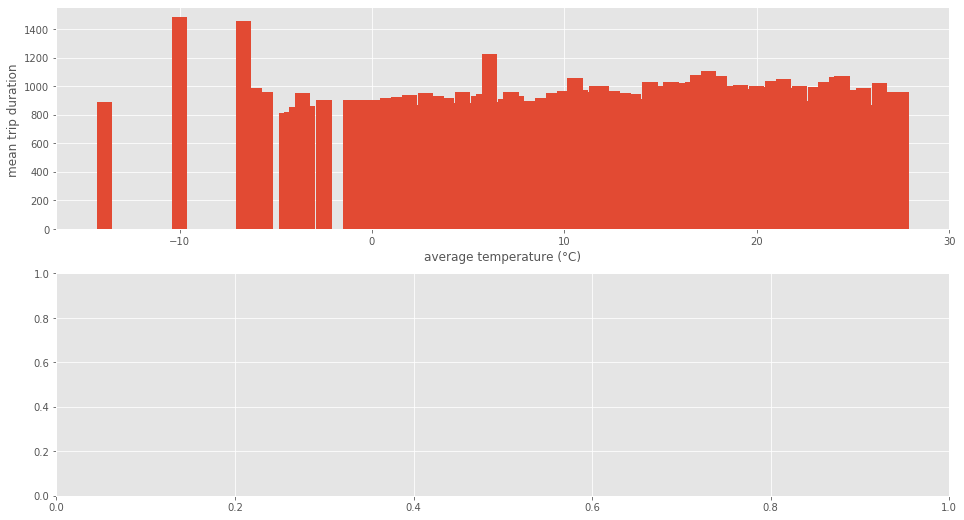

In [73]:
#trip duration of temperature
def print_duration_temperature():
  fig = plt.figure()


  axes = fig.add_subplot(2,1,1)
  duration_means_average_temp = train_data_w.groupby('average temperature (°C)').mean()['trip_duration']
  X1 = duration_means_average_temp.index
  Y1 = duration_means_average_temp.values
  axes = plt.bar(X1, Y1)
  axes = plt.xlabel('average temperature (°C)')
  axes = plt.ylabel('mean trip duration ')
  
  axes2 = fig.add_subplot(2,1,2)
  distance_means_average_temp = train_data_w.groupby('average temperature (°C)').mean()['distance_haversine']
  X2 = distance_means_average_temp.index
  Y2 = distance_means_average_temp.values
  axes2 = plt.bar(X2, Y2)
  axes2 = plt.xlabel('average temperature (°C)')
  axes2 = plt.ylabel('mean distance_haversine(km)')

  plt.show()

print_duration_temperature()

On analyse les moyennes de durée et de distance de trajet en fonction de la température moyenne. 
Pour la distance moyenne, on constate qu'il n'y a pas vraiment de différence en fonction de la température.
Pour la durée moyenne, on constate que pour les températures plus faibles, les durées de trajets augmentent. Cela semble logique.
Pour aller plus loin, on peut regarder en fonction des températures minimum et maximum.

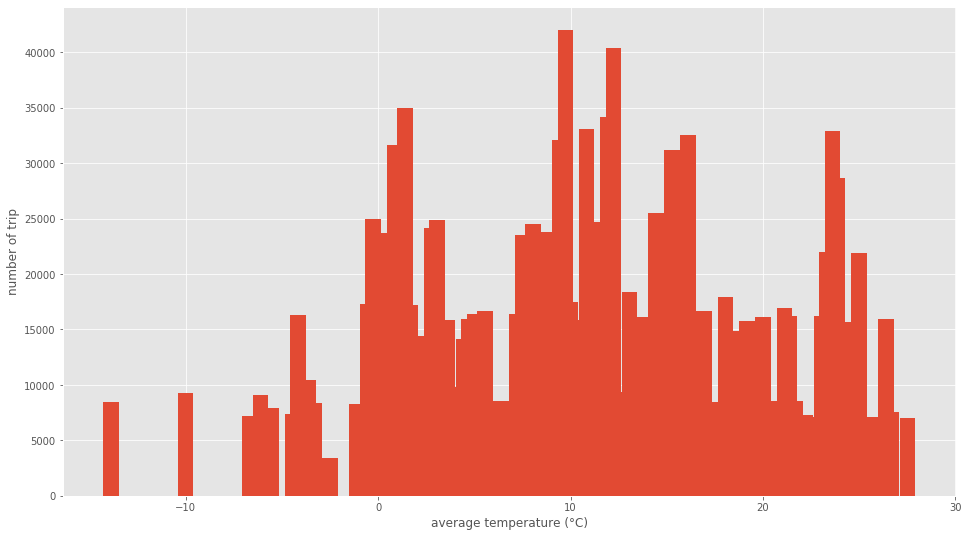

In [74]:
#number of trip of temperature
def print_frequency_trip_temperature():
  frequency_trip_temperature = train_data_w['average temperature (°C)'].value_counts()

  X = frequency_trip_temperature.index
  Y = frequency_trip_temperature.values

  plt.bar(X, Y)
  plt.xlabel('average temperature (°C)')
  plt.ylabel('number of trip')
  plt.show()

print_frequency_trip_temperature()

Je sais pas vraiment quoi en tirer. Les valeurs ne sont pas du tout équilibré. Il semble y a voir plus de trajets à lorsqu'il fait 0, 10, 15 et 25 degré Celsius.

In [0]:
def log_List(li):
    res = []
    for elem in li:
      res.append(elem)
    return(res)

log_trip_duration = log_List(train_data['trip_duration'])


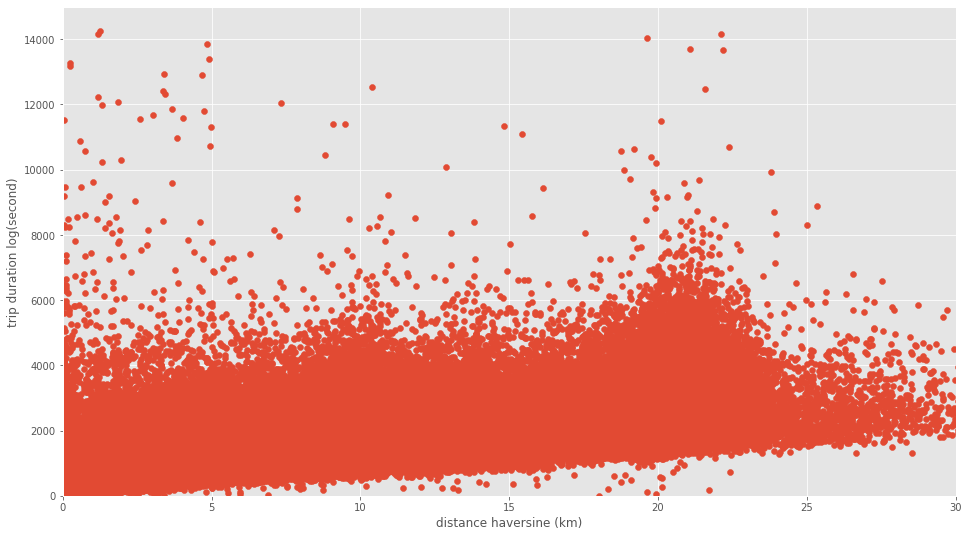

In [76]:
import math 

def print_duration_of_distance():
  plt.scatter(train_data['distance_haversine'], log_trip_duration )
  plt.xlabel('distance haversine (km)')
  plt.ylabel('trip duration log(second)')
  plt.xlim(0,30)
  plt.ylim(0,15000)
  plt.show()

print_duration_of_distance()

Remarque : On constate des valeurs extrêmes même avec le log. Il faudra sûrement les retirer lors du data cleaning. C'est pourquoi on choisit de limiter les distances en 0 et 30 km et les logs(durée) entre 0 et 15000 secondes.

On voit que plus la distance augmente, plus le trajet dure longtemps : ce qui est logique.
Cependant on peut voir des grandes disparités de durée de trajet peu importe la distance (exp(2000) d'écart-type) : cela peut être expliqué par le trafic et les bouchons. En effet, cela peut causer des trajets de courtes distances mais avec une plus longue durée que s'ils avaient lieu en campagne par exemple.

In [77]:
from matplotlib import cm

def print_corr(data, all):
  if(all):
    return(train_data.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm')))
  else:
    return(train_data_w[['pickup_hour', 'pickup_month','pickup_day', 'pickup_weekday','passenger_count','trip_duration','distance_haversine', 'speed', 'average temperature']].corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm')))

print_corr(train_data,0)


KeyError: ignored

On s'intéresse ici aux corrélations entre les variables notamment pour "trip_duration" et "distance_haversine". Malheuresement on observe aucune corrélation avec le reste des variables. On doit donc chercher des paramètres extérieurs/supplémentaires.

In [0]:
#On essaye de faire apparaître manhattan

plt.scatter(train_data['pickup_latitude'], train_data['pickup_longitude'])
plt.scatter(train_data['dropoff_latitude'], train_data['dropoff_longitude'])
plt.xlim(40.5,41)
plt.ylim(-74.25,-73.75)
plt.show()

In [0]:
train_data_
.to_csv()

## PCA : Projection 2D

On commence par adapter le dataset pour la projection.

In [0]:
train_pca = train_data
train_pca.head()

In [0]:
train_pca.pop('id')
train_pca.pop('pickup_datetime')
train_pca.pop('dropoff_datetime')
train_pca.pop('store_and_fwd_flag')
train_pca.pop('pickup_month')
train_pca.pop('pickup_day')
train_pca.pop('pickup_hour')
train_pca.pop('pickup_minute')
train_pca.pop('pickup_weekday')
train_pca.pop('dropoff_month')
train_pca.pop('dropoff_day')
train_pca.pop('dropoff_hour')
train_pca.pop('dropoff_minute')
train_pca.pop('dropoff_weekday')
#train_pca.pop('date')

train_pca.head()

On standardise la data pour qu'elle soit utilisable par la méthode des PCA

In [0]:
from sklearn.preprocessing import StandardScaler
features = ['pickup_longitude',	'pickup_latitude',	'dropoff_longitude',	'dropoff_latitude',	'distance_haversine',	'distance_dummy_manhattan']
# Separating out the features
x_pca = train_pca.loc[:, features].values
# Separating out the target
y_pca = train_pca.loc[:,['trip_duration']].values
# Standardizing the features
x_pca = StandardScaler().fit_transform(x_pca)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','pca3','pca4'])
print(pca.explained_variance_ratio_)
finalDf = pd.concat([principalDf, train_pca[['date']]], axis = 1)

finalDf.head()

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = train_pca['trip_duration'].values
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['trip_duration'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
train_data_w = pd.merge(train_data_w, finalDf , on = 'date', how = 'left')


# 3. Data Cleaning

**ToDo :**

1.   Check for outliers
2.   too long trips
3.   too short 
4.   etc...


# 4. Adding data

**ToDo :**

1.   Add the dataset ...-osmr on the drive to the current one.
2.   link the notebook with google map API.
3.   Add weather conditions.
4.   etc...

**Other Ideas :**

*   idea 1
*   idea 2



In [0]:
train_street_info = pd.concat((osmr_1, osmr_2))
train_data = train_data.merge(train_street_info, how='left', on='id')

# 5. Sélection de modèles

In [0]:
train_data.pop('id')
train_data.pop('store_and_fwd_flag')

In [0]:
train_data.head()
train_data.pop('dropoff_datetime')
train_data.pop('pickup_datetime')

In [0]:
train_features, train_labels, test_features, test_labels = create_train_test_set(train_data,0.01,0.1)

In [0]:
"""from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_features)
train_features = scaler.transform(train_features)

scaler = StandardScaler().fit(train_labels)
train_labels = scaler.transform(train_labels)

scaler = StandardScaler().fit(test_features)
test_features = scaler.transform(test_features)

scaler = StandardScaler().fit(test_labels)
test_labels = scaler.transform(test_labels)"""

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)

In [0]:
"""from sklearn.metrics import mean_squared_log_error
import numpy as np

cab_predictions  = lin_reg.predict(train_features)
for i in cab_predictions:
  if i < 0:
    print(i)"""

In [0]:
from sklearn.metrics import mean_squared_log_error
cab_predictions  = lin_reg.predict(train_features)

lin_mse = mean_squared_log_error(train_labels,cab_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [0]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(train_features, train_labels)

print('resulting features:')
print(result)

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_features,train_labels)

In [0]:
cab_predictions = tree_reg.predict(test_features)
tree_msle = mean_squared_log_error(test_labels, cab_predictions)
tree_rmsle = np.sqrt(tree_msle)
tree_rmsle

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,train_features,train_labels,
                         scoring="neg_mean_squared_log_error",cv=10)
tree_rmsle_scores = np.sqrt(-scores)

In [0]:
def display_scores(scores):
  print("Scores:",scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [0]:
display_scores(tree_rmsle_scores)

In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_features,train_labels)

In [0]:
cab_predictions = forest_reg.predict(test_features)
forest_msle = mean_squared_log_error(test_labels,cab_predictions)
forest_rmsle = np.sqrt(forest_msle)
print(forest_rmsle)

In [0]:
scores = cross_val_score(forest_reg,train_features,train_labels,
                         scoring="neg_mean_squared_log_error",cv=3)
forest_rmsle_scores = np.sqrt(-scores)

In [0]:
display_scores(forest_rmsle_scores)

# 6. Hyperparameters optimization

# Interesting functions

In [0]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val[:m])
    train_errors.append(mean_squared_log_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_log_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [0]:
train_features.info()

In [0]:
train_labels

In [0]:
import tensorflow as tf 

def small_dnn(input_shape,
              output_shape,
              summary = False):
        """ Creates a small dense neural network 
                Arguments :
                        input_shape : integer, the dimension of the input space
                        output_shape : interger, the dimension of the output space
                        summary = False : boolean to show the internal architecture of the neural network
                Output :
                        Return the dense neural network ready to fit
        """
        model = tf.keras.Sequential([
                tf.keras.layers.Dense(15,activation=tf.nn.tanh,input_shape=(input_shape,)),
                #tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dense(10,activation=tf.nn.tanh,input_shape=(15,)),
                tf.keras.layers.Dense(10,activation=tf.nn.tanh,input_shape=(10,)),
                tf.keras.layers.Dense(5,activation=tf.nn.tanh,input_shape=(10,)),
                #tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dense(output_shape)
        ])
        model.compile(loss='mean_squared_logarithmic_error',optimizer='sgd',metrics=['mean_squared_logarithmic_error'])
        if summary is True :
                print('Architecture of the Dense Neural Network : \n {}'.format(model.summary()))
        return model

def norm(x):
        """ Standardization of a dataset 
                Arguments :
                        x : pandas Dataframe contening the data to standardize
                Output :
                        a pandas DataFrame with standardize values
        """
        x_stats = x.describe().transpose()
        return(x/x_stats['std'])

def minmaxscaler(x):
        x_stats = x.describe().transpose()
        return ((x-x_stats['max'])/(x_stats['max']-x_stats['min']))



In [0]:
model = small_dnn(16,1,summary = True)
normed_train_features, normed_test_features = norm(train_features), norm(test_features)

In [0]:
#histories = model.fit(train_features, train_labels, batch_size=512, epochs=100, validation_data=(test_features, test_labels),verbose=1)
